In [14]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install packaging

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gp

netflix_movies = pd.read_csv('Netflix_Movies.csv')
netflix_movies.drop(['Unnamed: 0','Type'],axis=1,inplace=True)
netflix_movies.info()
netflix_movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631 entries, 0 to 1630
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1631 non-null   object 
 1   Director      1631 non-null   object 
 2   Countries     1631 non-null   object 
 3   Date Added    1631 non-null   object 
 4   Release Year  1631 non-null   int64  
 5   Certificate   1631 non-null   object 
 6   Runtime       1631 non-null   int64  
 7   Genres        1631 non-null   object 
 8   IMDB_rating   1631 non-null   float64
 9   Votes         1631 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 127.5+ KB


,Title,Director,Countries,Date Added,Release Year,Certificate,Runtime,Genres,IMDB_rating,Votes
0,#Alive,Cho Il,South Korea,"September 8, 2020",2020,TV-MA,99,"Horror Movies, International Movies, Thrillers",6.3,42842.0
1,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto",Italy,"July 1, 2020",2019,TV-14,95,"Documentaries, International Movies",6.6,1640.0
2,#FriendButMarried,Rako Prijanto,Indonesia,"May 21, 2020",2018,TV-G,102,"Dramas, International Movies, Romantic Movies",6.8,751.0
3,#FriendButMarried 2,Rako Prijanto,Indonesia,"June 28, 2020",2020,TV-G,104,"Dramas, International Movies, Romantic Movies",6.9,341.0
4,#Roxy,Michael Kennedy,Canada,"April 10, 2019",2018,TV-14,105,"Comedies, Romantic Movies",5.0,337.0


# Hypothesis

## Basic Hypothesis:
1. Is there a relationship between the runtime and IMDB rating of a movie?

2. Do movies with a higher release year tend to have higher IMDB ratings?

3. Is there a correlation between the number of votes and IMDB rating of a movie?

4. Are there any countries that produce more movies than others?

5. Is there a relationship between the certificate rating and the IMDB rating of a movie?

6. Are there any outliers in the dataset, such as movies with very low ratings despite having a high number of votes?

7. Are there any patterns in when movies were added to the platform, such as a higher number of movies being added during certain months?

8. Is there a relationship between the director and the IMDB rating of a movie?

9. Do certain genres tend to have higher IMDB ratings than others?

10. Are there any patterns in the release year of movies added to the platform, such as certain years having more releases than others?

## High Level Hypothesis:

11.	Which countries produce the highest rated movies, and which genres are popular in those countries?

12.	Are there any trends in the type of movies (such as TV shows vs. movies) that are added to the platform over time?

13.	Are there any directors who consistently produce highly rated movies across different genres?

14.	Are there any patterns in the number of votes received by movies from different countries?

15.	Is there a relationship between the certificate rating and the genres of movies?

16.	Is there a correlation between the release year and the runtime of movies?

17.	Do certain countries produce more movies of certain genres than others?

18.	Are there any patterns in the release dates of highly rated movies?

19.	Is there a relationship between the number of votes received by a movie and its release year?

20.	Are there any genres that have become more or less popular over time, and in which countries?

In [3]:
df = netflix_movies.copy()
df

,Title,Director,Countries,Date Added,Release Year,Certificate,Runtime,Genres,IMDB_rating,Votes
0,#Alive,Cho Il,South Korea,"September 8, 2020",2020,TV-MA,99,"Horror Movies, International Movies, Thrillers",6.3,42842.0
1,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto",Italy,"July 1, 2020",2019,TV-14,95,"Documentaries, International Movies",6.6,1640.0
2,#FriendButMarried,Rako Prijanto,Indonesia,"May 21, 2020",2018,TV-G,102,"Dramas, International Movies, Romantic Movies",6.8,751.0
3,#FriendButMarried 2,Rako Prijanto,Indonesia,"June 28, 2020",2020,TV-G,104,"Dramas, International Movies, Romantic Movies",6.9,341.0
4,#Roxy,Michael Kennedy,Canada,"April 10, 2019",2018,TV-14,105,"Comedies, Romantic Movies",5.0,337.0
...,...,...,...,...,...,...,...,...,...,...
1626,Zoo,Shlok Sharma,India,"July 1, 2018",2018,TV-MA,94,"Dramas, Independent Movies, International Movies",6.6,25309.0
1627,"¡Ay, mi madre!",Frank Ariza,Spain,"July 19, 2019",2019,TV-MA,81,"Comedies, International Movies",3.9,446.0
1628,Òlòtūré,Kenneth Gyang,Nigeria,"October 2, 2020",2020,TV-MA,107,"Dramas, International Movies",5.6,842.0
1629,​Goli Soda 2,Vijay Milton,India,"September 15, 2018",2018,TV-14,128,"Action & Adventure, Dramas, International Movies",7.1,923.0


## 1. Is there a relationship between the runtime and IMDB rating of a movie?

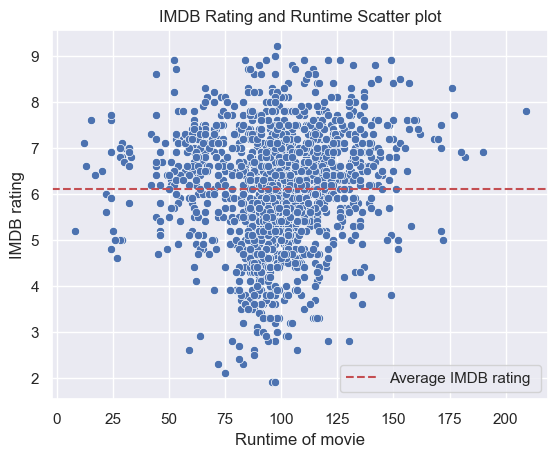

In [4]:
sns.set_theme()
sns.scatterplot(x='Runtime', y='IMDB_rating', data=df)
plt.title('IMDB Rating and Runtime Scatter plot')
plt.xlabel('Runtime of movie')
plt.ylabel('IMDB rating')
plt.axhline(y=df['IMDB_rating'].mean(), color='r', linestyle='--',label='Average IMDB rating ')
plt.legend()
plt.show()

There seems to be a postive relationship between the IMDB rating and the runtime of the movies, which implies that if the runtime of the movie is increased, the IMDB ratings also increase but we cannot confirm it. The average IMDB rating for all the movies listed in Netflix and released in 2018 to 2021 is around 6.1. 

So, we can confirm that it does not matter how long the duration of the movie is, the IMDB rating will not be affected. The runtime of the movie is not significant with the IMDB rating.

## 2. Do the IMDB ratings increase along with the release year? 

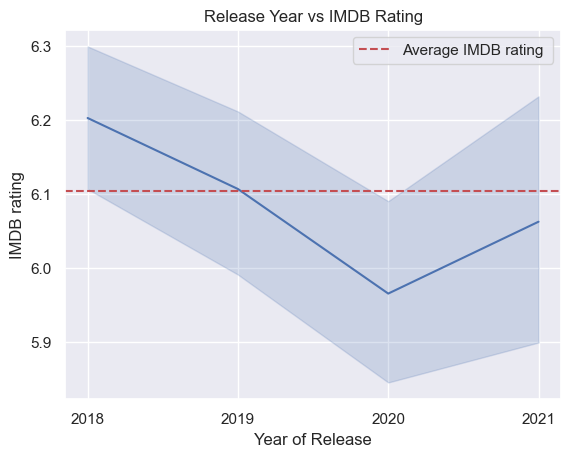

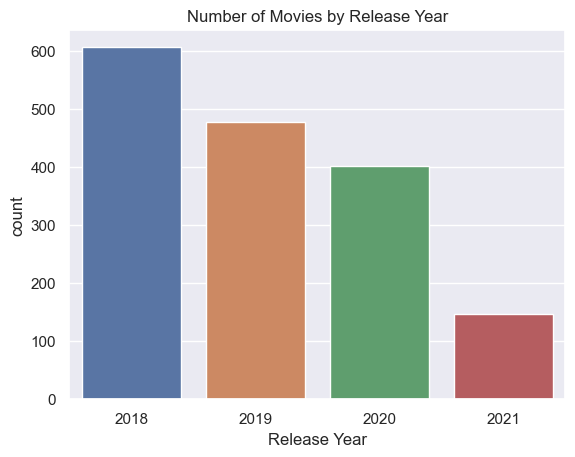

In [5]:
sns.lineplot(x='Release Year', y='IMDB_rating', data=df)
plt.title('Release Year vs IMDB Rating')
plt.xticks([2018,2019,2020,2021])
plt.ylabel('IMDB rating')
plt.xlabel('Year of Release')
plt.axhline(y=df['IMDB_rating'].mean(), color='r', linestyle='--',label='Average IMDB rating ')
plt.legend()
plt.show()
#plt.figure(figsize=(9,5))
sns.countplot(x='Release Year', data=df, order=df['Release Year'].value_counts().index)
plt.title('Number of Movies by Release Year')
plt.show()


From the plot, we can interpret that the IMDB ratings for the movies decreased from the year 2018 to 2020 but later it increased from 2020 to 2021 although it does not reach the average of 6.1 we can conclude that movies with good content started releasing from the year 2020. But from the count plot we can notice that in the year 2018 more than 600 movies were released and year by year till 2021 the number of releases got decreased. Although 2021 has the least releases the average IMDB ratings is more than that of 2020.

## 3. Is there a correlation between the number of votes and IMDB rating of a movie?

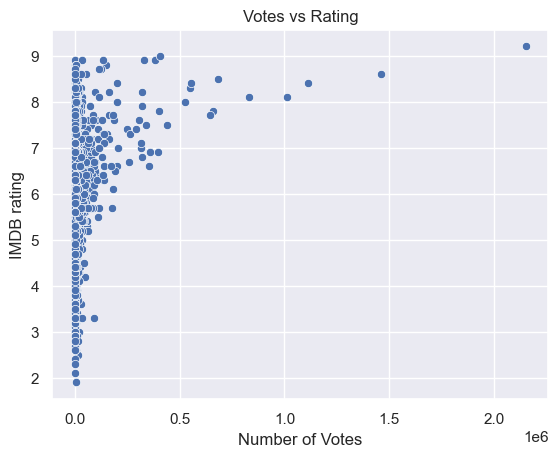

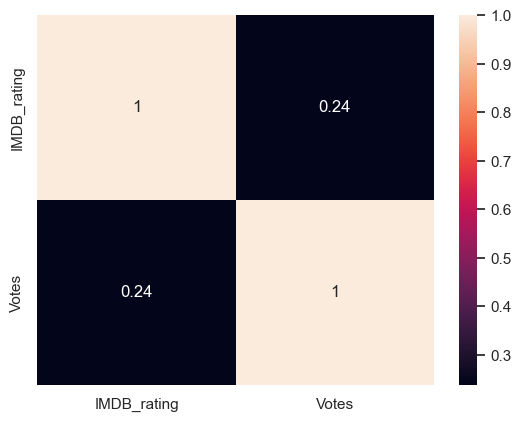

In [6]:
ax = sns.scatterplot(x='Votes', y='IMDB_rating', data=df)
plt.title('Votes vs Rating')
plt.ylabel('IMDB rating')
plt.xlabel('Number of Votes')
plt.show()
ax = sns.heatmap(df[['IMDB_rating','Votes']].corr(), annot=True)


The votes and IMDB rating do not have a very high correlation. The correlation factor is just 0.24 from which we can conclude that high number of votes do not have high IMDB ratings. But from the scatter plot between votes and IMDB rating we can notice an outlier which infer that despite having no correlation between votes and ratings, there are few movies which received highest number of highest and also has high ratings.

## 4. Are there any countries that produce more movies than others?

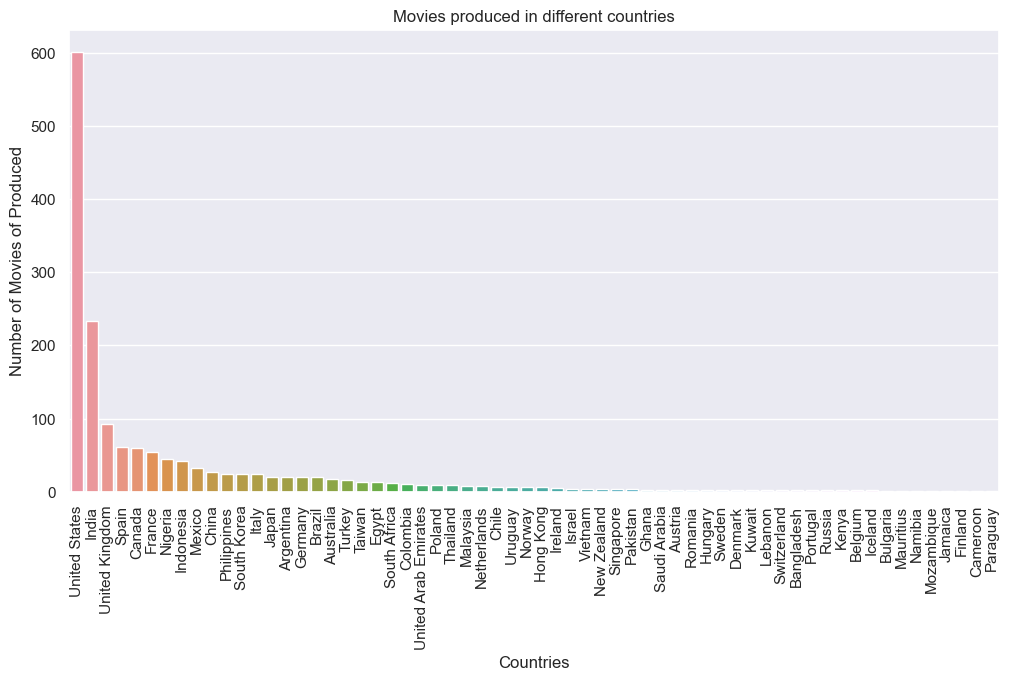

In [7]:
# create a new column 'sorted_countries'
#df['sorted_countries'] = df['Countries'].str.split(',').apply(lambda x: ', '.join(sorted(x))).str.strip()
# create a new column 'first_country'
df['first_country'] = df['Countries'].str.split(',').str[0].str.strip()
count = df['first_country'].value_counts()

plt.figure(figsize=(12,6))
sns.countplot(x='first_country', data=df, order=count.index)
plt.title('Movies produced in different countries')
plt.xlabel('Countries')
plt.ylabel('Number of Movies of Produced')
plt.xticks(rotation=90)
plt.show()

We can intrepret that United States has produced the highest number of movies listed in Netflix which are released between 2018 to 2021, under the assumption that only the first country is considered from the list of countries that movie was released. Here we are making this assumption just to confirm which country produces the highest number of movies.

So, United states has produced more than 600 movies which are released between 2018 and 2021 and are listed in Netflix.

## 5. Is there a relationship between the certificate rating and the IMDB rating of a movie?

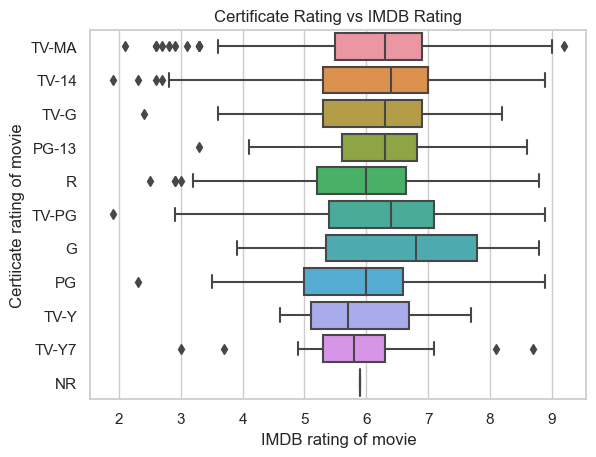

In [8]:
sns.set_theme(style="whitegrid")
sns.boxplot(x='IMDB_rating', y='Certificate', data=df)
plt.title('Certificate Rating vs IMDB Rating')
plt.xlabel('IMDB rating of movie')
plt.ylabel('Certiicate rating of movie')
plt.show()

The box plot shows there are a few outliers in the data which suggests that there are movies which are rated less than the average IMDB ratings for that particular certificate rating. We can also confirm from here, that the data is skewed right concluding that the IMDB rating is not normally distributed. The highest ratings for a movie are given for a 'TV-MA' certificate rating but the highest average rating is for a 'G' certificate rating movie, which is more than the average of TV-MA movie.

## 6. In which month are the movies added to the platform more?

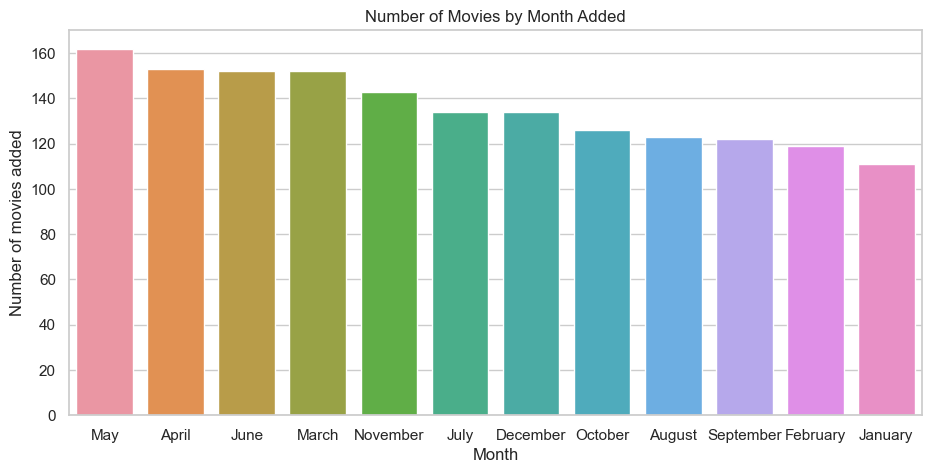

In [9]:
df['Month'] = pd.to_datetime(df['Date Added']).dt.month_name()
Month_order = df['Month'].value_counts().index
plt.figure(figsize=(11,5))
sns.countplot(x='Month', data=df, order=Month_order)
plt.title('Number of Movies by Month Added')
plt.xlabel('Month')
plt.ylabel('Number of movies added')
plt.show()

Suprisingly, movies are majorly added to Netflix in the summer season which is April, May and June instead of spring. More than 160 movies which were released between 2018 to 2021 were added to Netflix in the month of May.

## 7. Do certain genres tend to have higher IMDB ratings than others?

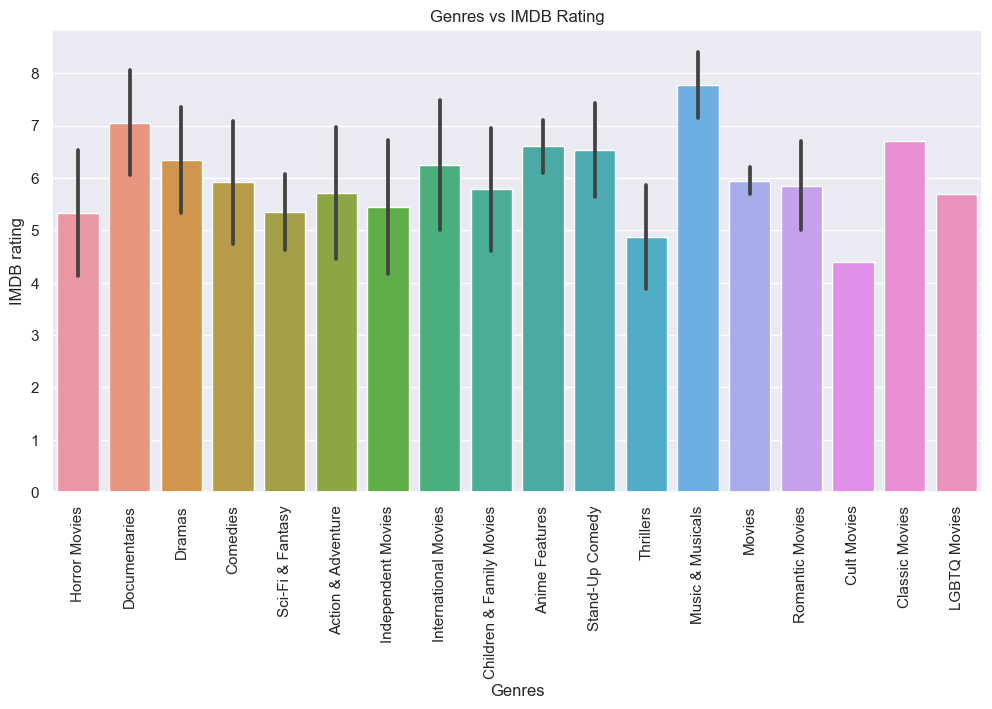

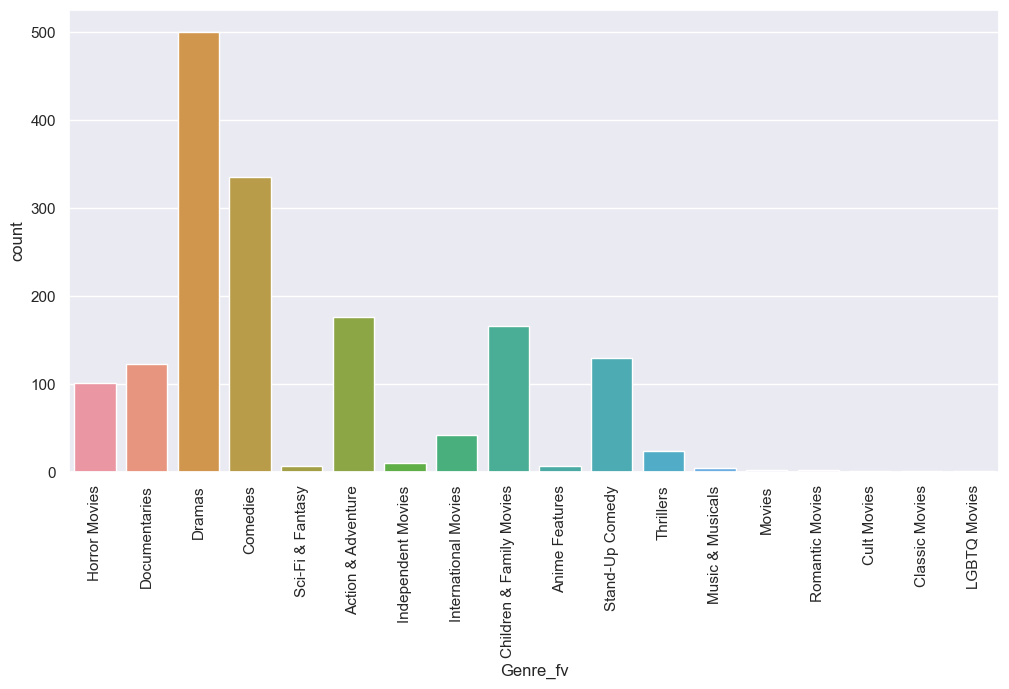

In [10]:
df['Genre_fv'] = df['Genres'].str.split(',').str[0].str.strip()
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,6))
sns.barplot(x='Genre_fv', y='IMDB_rating', data=df, ci='sd')
plt.title('Genres vs IMDB Rating')
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('IMDB rating')
plt.show()
plt.figure(figsize=(12,6))
sns.countplot(x='Genre_fv', data=df)#, order=df['Genre_fv'].value_counts.index())
plt.xticks(rotation=90)
plt.show()

From the above plot we can depict that the movies with 'Music & Musicals' have the highest average IMDB ratings of around  among all other genres. The lowest is listed for 'Cult Movies'. Apparently, movies with genres like 'Dramas'and 'Comedies' which have high number of movie count do not have the highest average rating, which maybe because of few movies receiving low ratings in that genre which bring down the average. Yet, we can confirm that movies made with the genre 'Dramas' will have significant effect on the IMDB ratings of that movie instead of a movie made with 'Music & Musicals' genre.

## 8. Are there any directors who consistently produce highly rated movies across different genres?

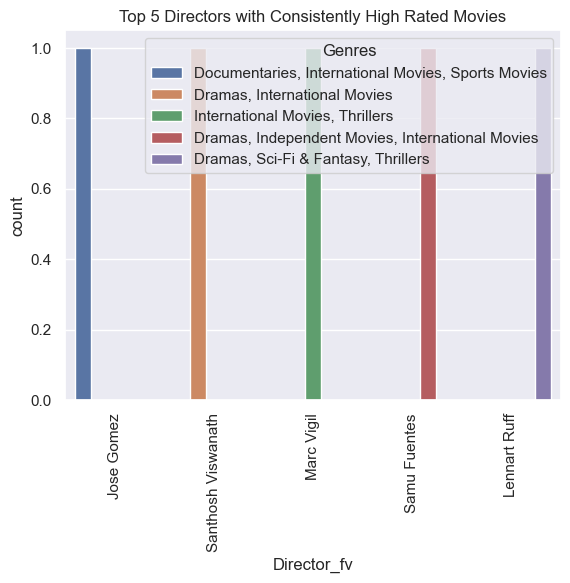

In [11]:
df['Director_fv'] = df['Director'].str.split(',').str[0].str.strip()
top_directors = df.groupby('Director_fv')['IMDB_rating'].mean().sort_values(ascending=False).head(5).index

top_director_movies = df[df['Director_fv'].isin(top_directors)]

sns.countplot(x='Director_fv', hue='Genres', data=top_director_movies)
plt.title('Top 5 Directors with Consistently High Rated Movies')
plt.xticks(rotation=90)
plt.show()

From the above countplot we can conclude that these 5 directors have maintaned good conduct in their movies. These movies have the highest average IMDB rating released between 2018 to 2021 and are also listed in Netflix. Also, we can interpret that movies made of genres 'Dramas'have maintained a good average rating which also supports the previous hypothesis.

## 9. Are there any patterns in the release dates of highly rated movies?

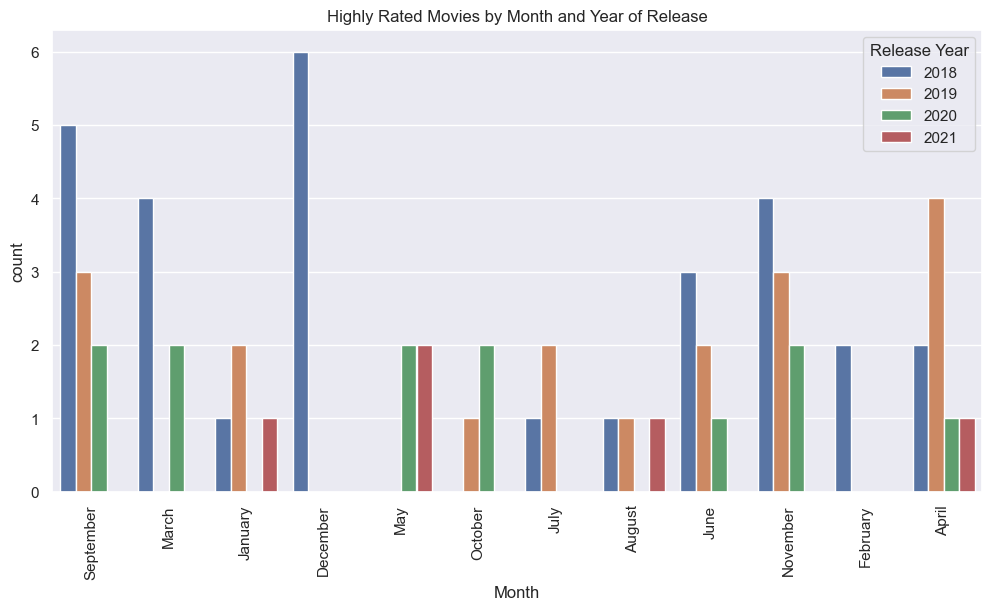

In [12]:
high_rated_movies = df[df['IMDB_rating'] > 8.0]
plt.figure(figsize=(12,6))
sns.countplot(x='Month', hue='Release Year', data=high_rated_movies)
plt.title('Highly Rated Movies by Month and Year of Release')
plt.xticks(rotation=90)
plt.show()

Here can see that movies released in year 2018 are only listed in December and every year movies were released in April. But the average amount of movies were more released in the month September.

## 10. Is there a relationship between the number of votes received by a movie and its release year?

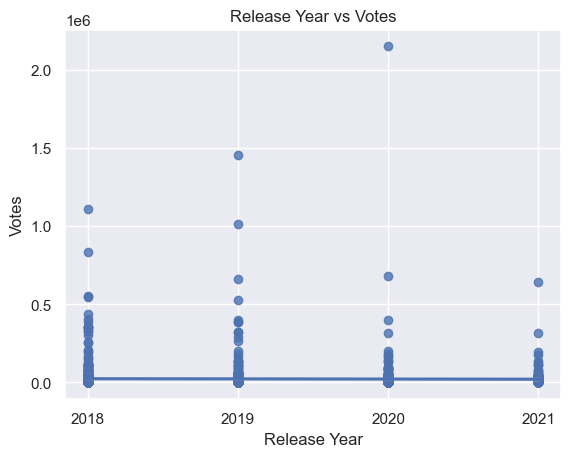

In [14]:
sns.regplot(x='Release Year', y='Votes', data=df)
plt.title('Release Year vs Votes')
plt.xticks([2018,2019,2020,2021])
plt.show()

It seems that release year has had a significant effect on the votes received for the movies. There seems to be an outlier in the year 2020 which has abnormally high votes compared to others. Most votes were received in the movies released in the year 019 although it has less IMDB ratings based on the conclusion from the previous hypothesis.

## 11. Are there any genres that have become more or less popular over time, and in which countries?

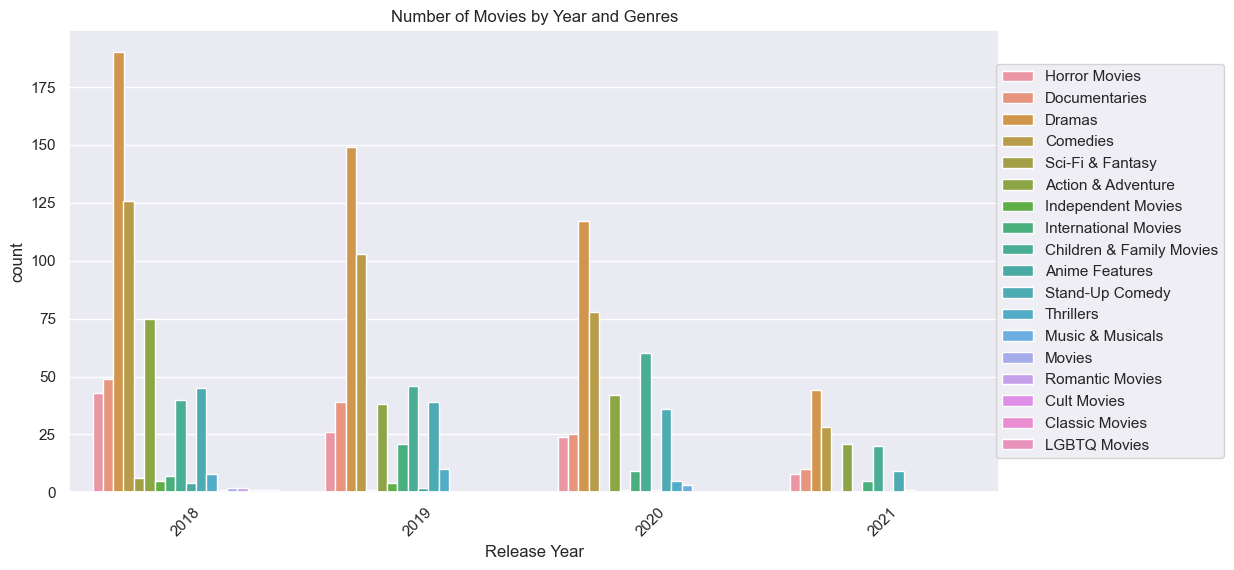

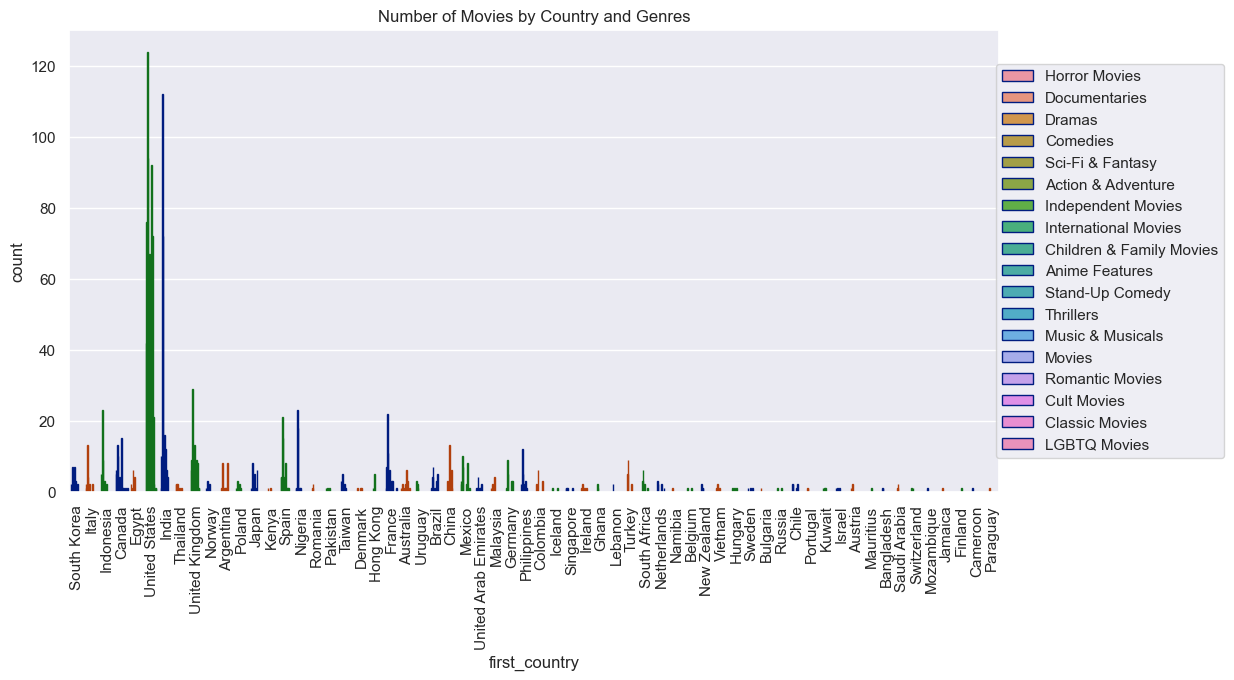

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x='Release Year', hue='Genre_fv', data=df)
plt.title('Number of Movies by Year and Genres')
plt.xticks(rotation=45)
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x='first_country', hue='Genre_fv', data=df, edgecolor=sns.color_palette("dark", 3))
plt.title('Number of Movies by Country and Genres')
plt.xticks(rotation=90)
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
plt.show()

Based on the above plots we can confirm that 2018 has more releases and united states seems to contribute more to that. Also, we can support the previous hypothesis that Dramas and Comedies genre movies are contributing more to the count of movies released and their average ratings is also good.

## 12. Are there any patterns in the number of votes received by movies from different countries?

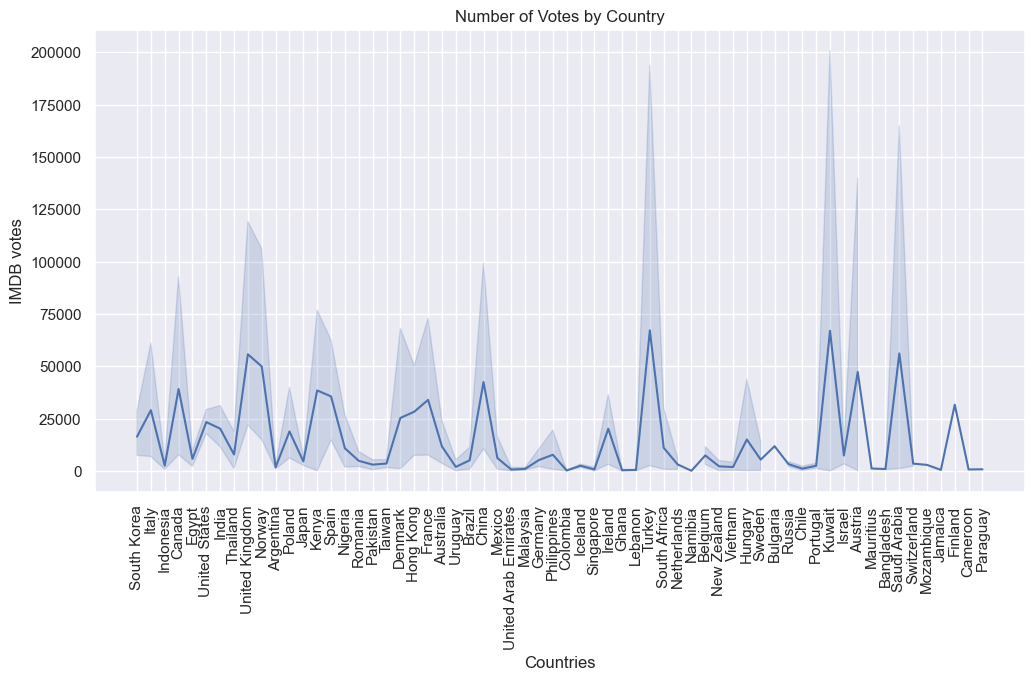

In [16]:
plt.figure(figsize=(12,6))
sns.lineplot(x='first_country', y='Votes', data=df)#, ci='sd')
plt.title('Number of Votes by Country')
plt.xlabel('Countries')
plt.ylabel('IMDB votes')
plt.xticks(rotation=90)
plt.show()

There seems to be no specific pattern based on the votes but it seems that most of the votes were sent from the Turkey country even though United States has more movies released. So we can conclude that there is no specific pattern in the votes based on the country. The votes are not relevant to the country of the movies they were released in and are listed in the Netflix OTT 